In [18]:
# Qua è dove andrò ad eseguire il codice per fare un po' di data visualization

In [19]:
import pandas as pd

In [20]:
import glob
all_folders=glob.glob('../A_DeviceMotion_data/*', recursive=True)
complete_df=pd.DataFrame()
class_dict={"dws":"downstairs", "jog": "jogging", "sit":"sit", "std":"standing", "ups":"upstairs", "wlk":"walking"}
for folder in all_folders:
    all_files=glob.glob(folder+"/*", recursive=True)
    class_name=folder.split('\\')[1].split('_')[0]
    for file in all_files:
        df=pd.read_csv(file, index_col=0)
        df["class"]=class_dict[class_name]
        complete_df=pd.concat([complete_df, df], ignore_index=True)
complete_df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,class
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,downstairs
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,downstairs
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,downstairs
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,downstairs
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,walking
1412861,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,walking
1412862,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,walking
1412863,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,walking


Text(0.5, 1.0, 'Classes distribution')

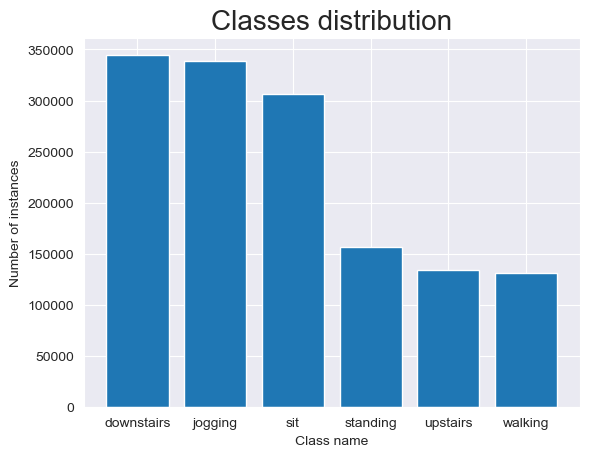

In [21]:
from matplotlib import pyplot as plt
classes=complete_df["class"].unique()
value_count=complete_df["class"].value_counts()
plt.bar(classes, value_count)
plt.xlabel("Class name")
plt.ylabel("Number of instances")
plt.title("Classes distribution", fontsize=20)

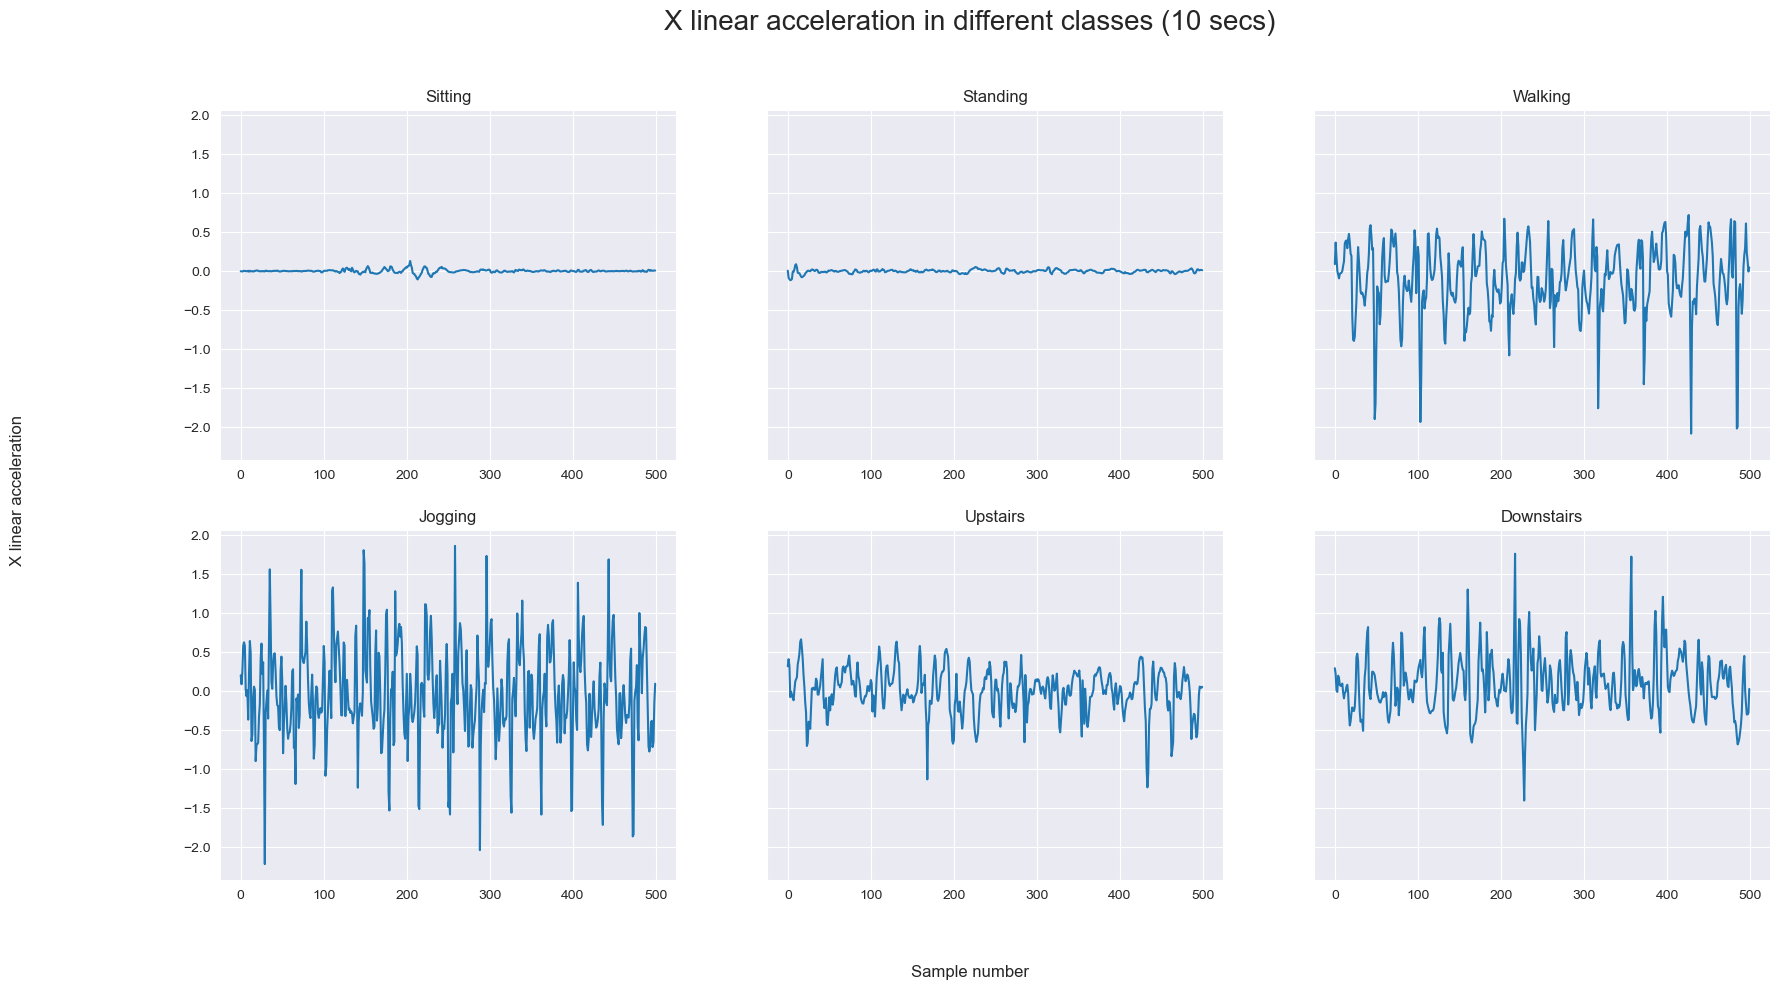

In [22]:
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
sitting_df=pd.read_csv("../A_DeviceMotion_data/sit_5/sub_1.csv")["userAcceleration.x"][0:500]
standing_df=pd.read_csv("../A_DeviceMotion_data/std_6/sub_1.csv")["userAcceleration.x"][0:500]
walking_df=pd.read_csv("../A_DeviceMotion_data/wlk_7/sub_1.csv")["userAcceleration.x"][0:500]
jogging_df=pd.read_csv("../A_DeviceMotion_data/jog_9/sub_1.csv")["userAcceleration.x"][0:500]
upstairs_df=pd.read_csv("../A_DeviceMotion_data/ups_3/sub_1.csv")["userAcceleration.x"][0:500]
downstairs_df=pd.read_csv("../A_DeviceMotion_data/dws_1/sub_1.csv")["userAcceleration.x"][0:500]

f.suptitle("X linear acceleration in different classes (10 secs)", fontsize=20)
f.supxlabel("Sample number")
f.supylabel("X linear acceleration")
axes[0][0].plot(sitting_df)
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(standing_df)
axes[0][1].title.set_text("Standing")
axes[0][2].plot(walking_df)
axes[0][2].title.set_text("Walking")
axes[1][0].plot(jogging_df)
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(upstairs_df)
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(downstairs_df)
axes[1][2].title.set_text("Downstairs")

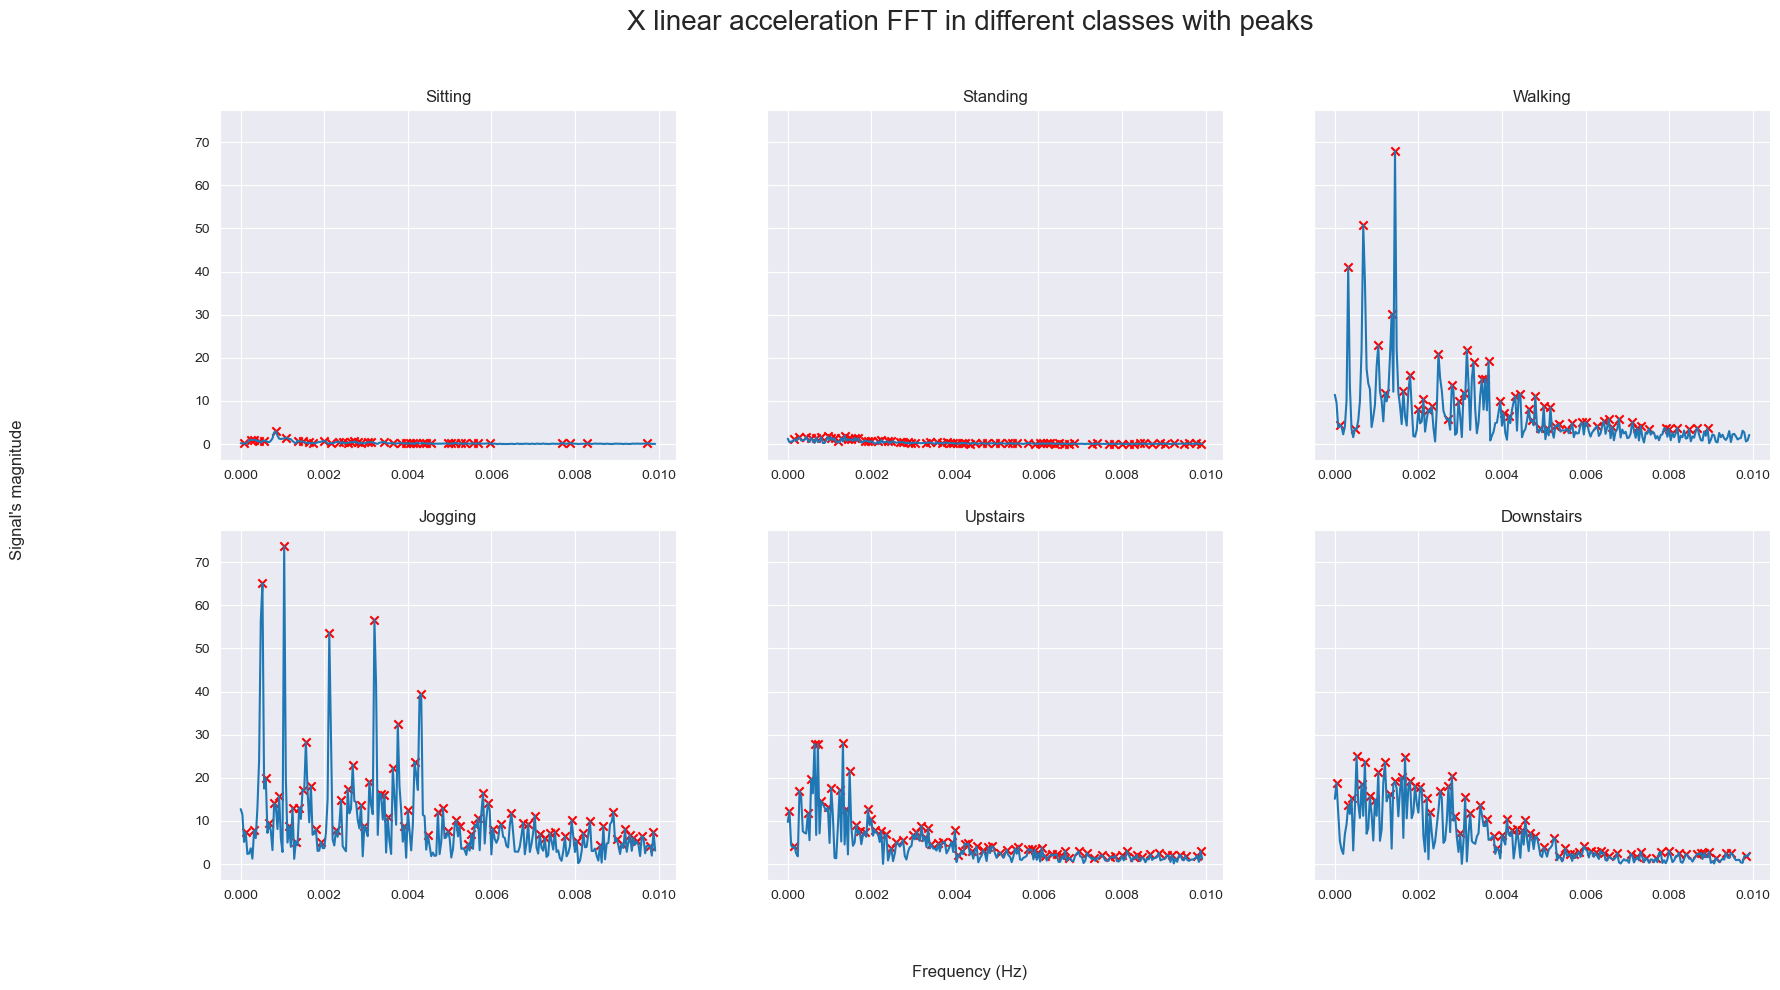

In [23]:
import detecta
from numpy.fft import fft
import numpy as np
N=500
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T
c=20

# FFT computing
n_oneside=N//2
x=freq[1:n_oneside]
y_sit=np.abs(fft(sitting_df)[1:n_oneside])
y_std=np.abs(fft(standing_df)[1:n_oneside])
y_wlk=np.abs(fft(walking_df)[1:n_oneside])
y_jog=np.abs(fft(jogging_df)[1:n_oneside])
y_ups=np.abs(fft(upstairs_df)[1:n_oneside])
y_dwn=np.abs(fft(downstairs_df)[1:n_oneside])

# PEAKS computing
p_x_sit=detecta.detect_peaks(y_sit, mph=np.amax(y_sit)/c)
p_x_std=detecta.detect_peaks(y_std, mph=np.amax(y_std)/c)
p_x_wlk=detecta.detect_peaks(y_wlk, mph=np.amax(y_wlk)/c)
p_x_jog=detecta.detect_peaks(y_jog, mph=np.amax(y_jog)/c)
p_x_ups=detecta.detect_peaks(y_ups, mph=np.amax(y_ups)/c)
p_x_dwn=detecta.detect_peaks(y_dwn, mph=np.amax(y_dwn)/c)

#PLOT
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("X linear acceleration FFT in different classes with peaks", fontsize=20)
f.supxlabel("Frequency (Hz)")
f.supylabel("Signal's magnitude")
axes[0][0].plot(x,y_sit)
axes[0][0].scatter(p_x_sit/T, y_sit[p_x_sit], marker="x", c="red")
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(x,y_std)
axes[0][1].scatter(p_x_std/T, y_std[p_x_std], marker="x", c="red")
axes[0][1].title.set_text("Standing")
axes[0][2].plot(x,y_wlk)
axes[0][2].scatter(p_x_wlk/T, y_wlk[p_x_wlk], marker="x", c="red")
axes[0][2].title.set_text("Walking")
axes[1][0].plot(x,y_jog)
axes[1][0].scatter(p_x_jog/T, y_jog[p_x_jog], marker="x", c="red")
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(x,y_ups)
axes[1][1].scatter(p_x_ups/T, y_ups[p_x_ups], marker="x", c="red")
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(x,y_dwn)
axes[1][2].scatter(p_x_dwn/T, y_dwn[p_x_dwn], marker="x", c="red")
axes[1][2].title.set_text("Downstairs")

In [24]:
# now we'll do an analysis on the windowed dataset

In [25]:
win_df=pd.read_csv("../collapsed_datasets/dataset_peaks_2.csv").drop("Unnamed: 0", axis=1)
win_df

,rotationRate.x_mean,rotationRate.x_std,rotationRate.x_range,rotationRate.x_IRQ,rotationRate.y_mean,rotationRate.y_std,rotationRate.y_range,rotationRate.y_IRQ,rotationRate.z_mean,rotationRate.z_std,...,userAcceleration.zX#2,userAcceleration.zX#3,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5,class
0,-0.397279,1.010138,4.350167,1.484823,-0.477000,1.660224,9.061658,1.793092,0.171176,0.647478,...,0.000469,0.000625,0.000781,0.000937,3.241656,3.714391,16.300506,15.681829,11.990148,downstairs
1,-0.438162,0.943434,3.772980,1.553190,-0.354772,1.696376,8.361935,2.041611,0.133445,0.604762,...,0.000313,0.000625,0.000937,0.001172,3.623143,4.683522,15.760991,16.096041,9.022259,downstairs
2,-0.295245,0.924794,4.009096,1.344492,-0.256409,1.886258,8.521790,2.172524,0.134601,0.579321,...,0.000625,0.000859,0.001016,0.001406,10.463751,11.260529,9.669604,25.236866,6.218379,downstairs
3,-0.236770,0.849819,3.572896,1.325682,-0.103173,1.943091,8.745239,1.816573,0.133657,0.580356,...,0.000625,0.001016,0.001250,0.001484,13.745319,8.400983,21.838771,3.692462,11.309039,downstairs
4,-0.474402,0.923975,4.271556,1.219991,-0.346575,1.808360,8.987814,2.065066,0.182756,0.601158,...,0.000391,0.000703,0.001016,0.001484,2.545804,6.547096,12.381141,19.712297,11.190668,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.035452,1.688532,6.422358,2.527054,0.063604,1.021769,5.108763,1.357514,0.071187,0.633553,...,0.000703,0.001016,0.001406,0.001797,23.718284,31.840430,20.433782,24.044175,21.108540,walking
4967,-0.020113,1.632168,5.848574,2.487525,0.059578,0.976765,4.903919,1.104986,0.040612,0.610010,...,0.000703,0.001016,0.001406,0.001797,20.964158,34.626960,16.084131,24.734349,13.281380,walking
4968,-0.037974,1.604069,6.302658,2.329658,0.038600,1.031476,4.826740,1.259023,0.091880,0.647086,...,0.000469,0.000625,0.000781,0.001016,16.482184,2.922023,46.326739,5.268941,26.365194,walking
4969,0.077931,1.664169,6.251866,2.596461,0.019291,1.033120,4.527154,1.156266,0.103089,0.634398,...,0.000625,0.001016,0.001328,0.001719,16.453592,45.842248,25.223514,21.787061,21.124738,walking


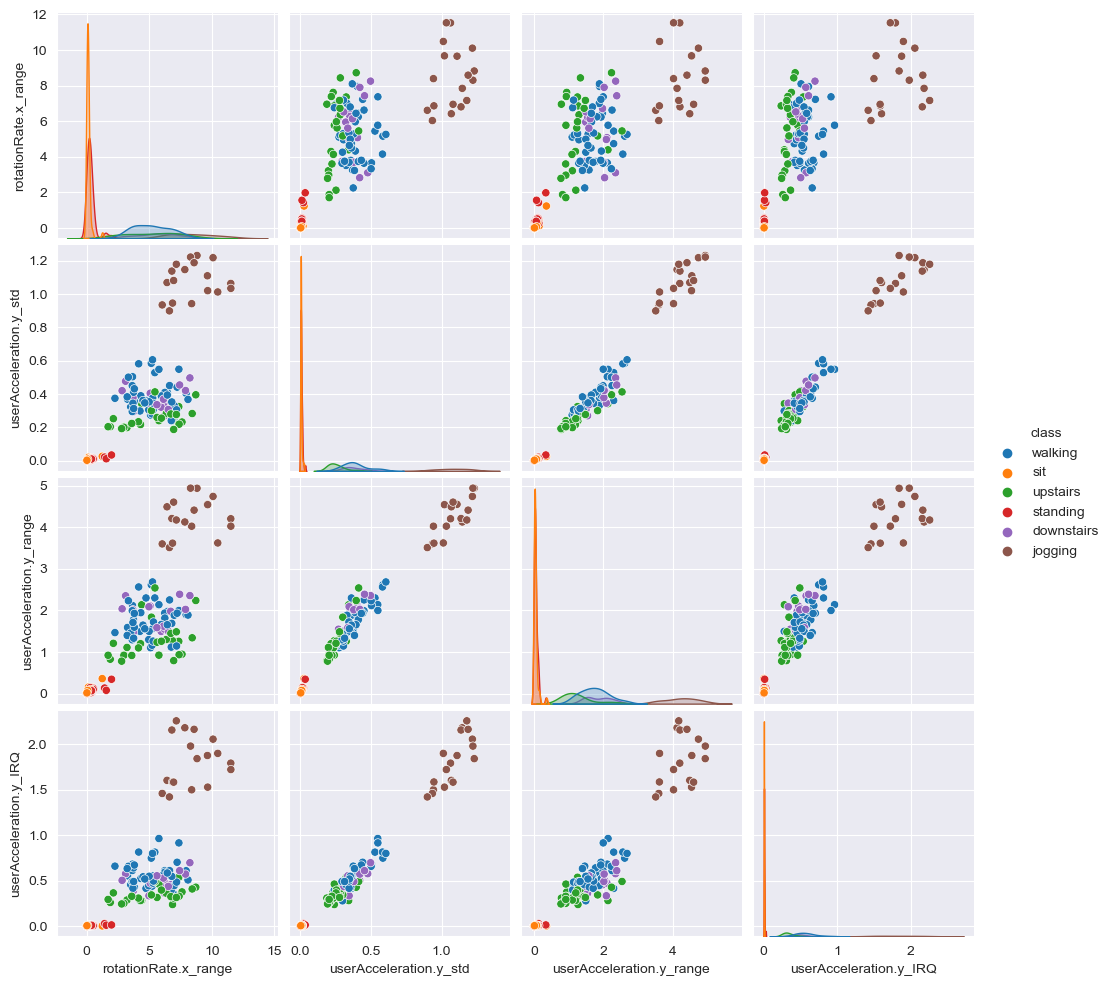

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import numpy
import seaborn as sns
le=LabelEncoder()
feature_sel = SelectKBest(k=4).fit(win_df.drop("class", axis=1), le.fit_transform(win_df["class"]))
fsel=feature_sel.get_support(indices=True)
fsel=numpy.append(fsel, 84)
win_df_fsel=win_df.iloc[:, fsel]

sns.pairplot(data=win_df_fsel.sample(n=200), hue="class")


[Text(0, 0, 'downstairs'),
 Text(1, 0, 'jogging'),
 Text(2, 0, 'sit'),
 Text(3, 0, 'standing'),
 Text(4, 0, 'upstairs'),
 Text(5, 0, 'walking')]

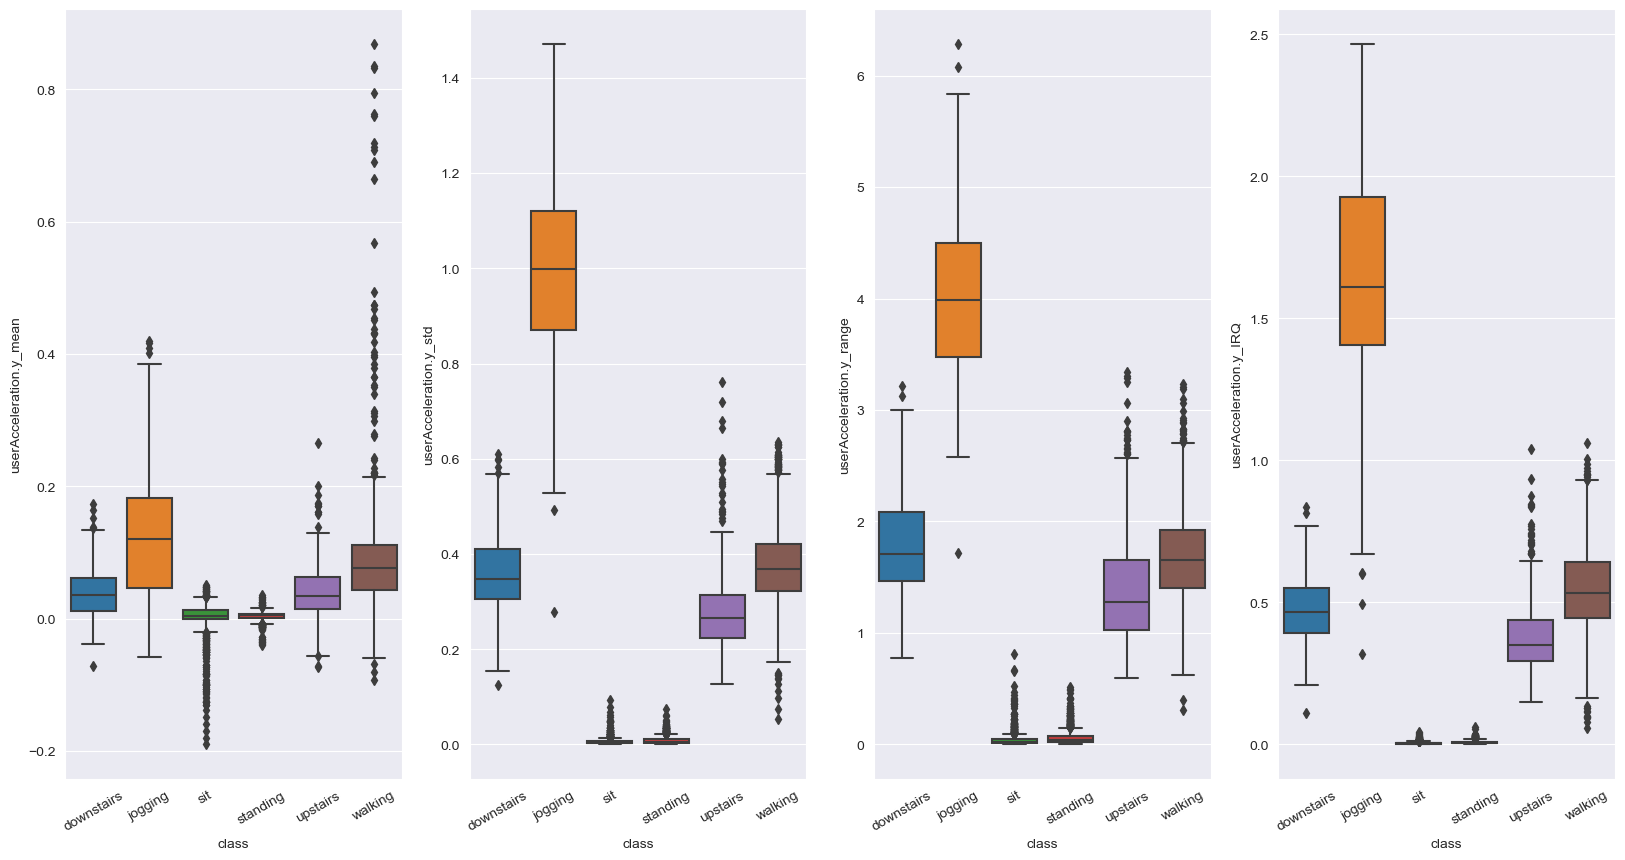

In [27]:
fig, axes=plt.subplots(1,4, figsize=(20,10))
ax1=sns.boxplot(ax=axes[0],data=win_df, x="class", y="userAcceleration.y_mean")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax2=sns.boxplot(ax=axes[1],data=win_df, x="class", y="userAcceleration.y_std")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax3=sns.boxplot(ax=axes[2],data=win_df, x="class", y="userAcceleration.y_range")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
ax4=sns.boxplot(ax=axes[3],data=win_df, x="class", y="userAcceleration.y_IRQ")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30)

In [28]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import numpy
import seaborn as sns

# Create correlation matrix
corr_matrix = win_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
non_corr_df=win_df.drop(to_drop, axis=1)



C:\Users\marco\AppData\Local\Temp\ipykernel_10444\761823625.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = win_df.corr().abs()
C:\Users\marco\AppData\Local\Temp\ipykernel_10444\761823625.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


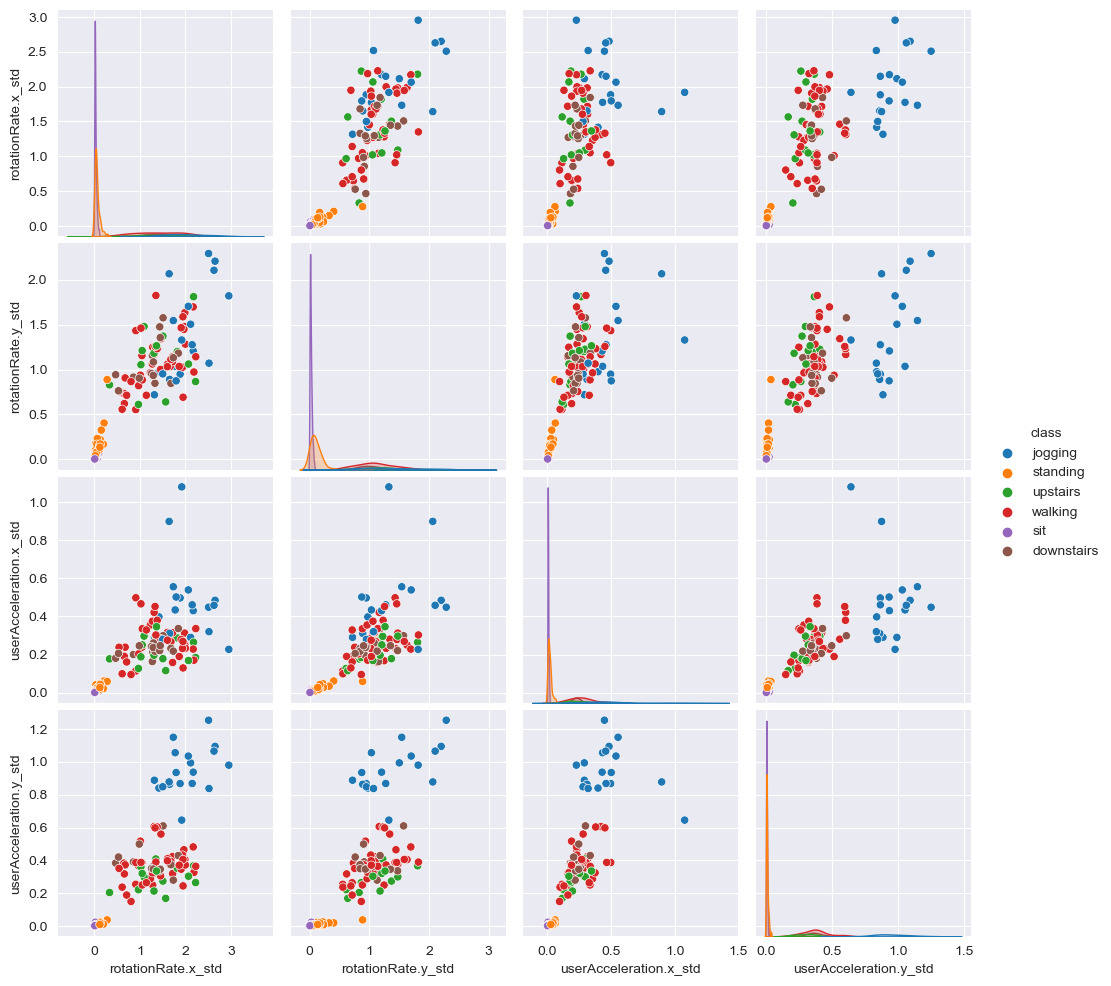

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import numpy

le=LabelEncoder()
feature_sel_non_corr = SelectKBest(k=4).fit(non_corr_df.drop("class", axis=1), le.fit_transform(non_corr_df["class"]))
fsel_nc=feature_sel_non_corr.get_support(indices=True)

fsel_nc=numpy.append(fsel_nc, 72)
non_corr_df_fsel=non_corr_df.iloc[:, fsel_nc]

sns.pairplot(data=non_corr_df_fsel.sample(n=200), hue="class")

[Text(0, 0, 'downstairs'),
 Text(1, 0, 'jogging'),
 Text(2, 0, 'sit'),
 Text(3, 0, 'standing'),
 Text(4, 0, 'upstairs'),
 Text(5, 0, 'walking')]

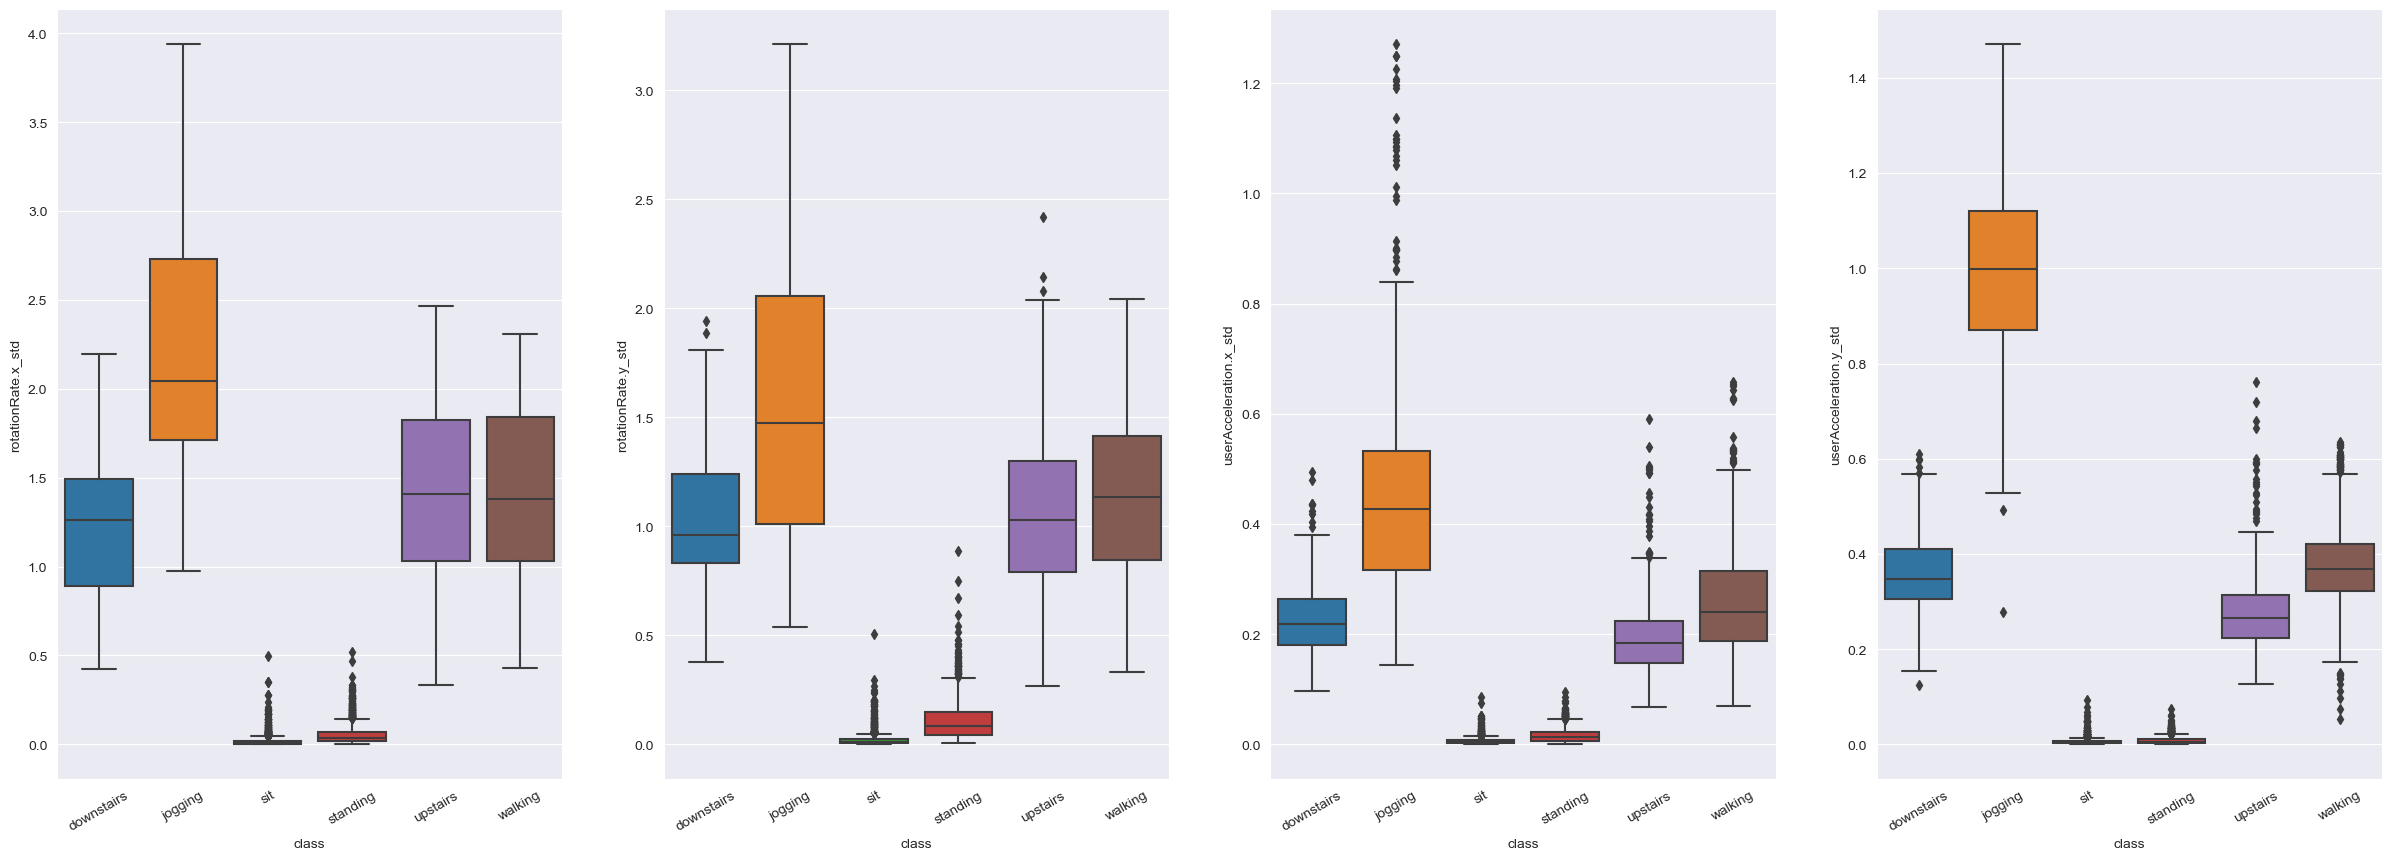

In [31]:
fig, axes=plt.subplots(1,4, figsize=(30,10))
ax1=sns.boxplot(ax=axes[0],data=win_df, x="class", y="rotationRate.x_std")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax2=sns.boxplot(ax=axes[1],data=win_df, x="class", y="rotationRate.y_std")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax3=sns.boxplot(ax=axes[2],data=win_df, x="class", y="userAcceleration.x_std")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
ax4=sns.boxplot(ax=axes[3],data=win_df, x="class", y="userAcceleration.y_std")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(non_corr_df.drop("class", axis=1), non_corr_df["class"], random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 123)
classifier=KNeighborsClassifier(n_neighbors=5)
sfs=SequentialFeatureSelector(classifier,
                              cv=skf,
                              scoring="accuracy",
                              direction="forward",
                              n_features_to_select=4,
                              n_jobs=-1
                              )
sfs.fit(X_train, y_train)
sfs.scoring


TypeError: 'str' object is not callable

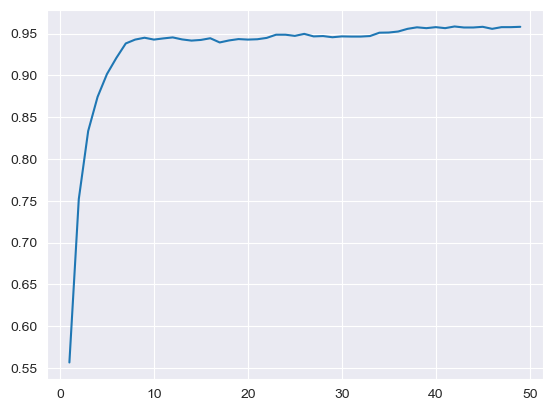

In [49]:
# vediamo come variano le statistiche al variare di k numero di feature da selezionare

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

X=non_corr_df.drop("class", axis=1)
y=non_corr_df["class"]

results_list=[]

for k in range (1,50):
    pipe=Pipeline([
        ("feature_selection",SelectKBest(k=k)),
        ("classifier", RandomForestClassifier())
    ])
    results=cross_val_score(pipe, X, y, cv=KFold(5, shuffle=True, random_state=12) )
    results_list.append(np.mean(results))

x=np.arange(1, 50)
plt.plot(x, results_list)



In [51]:
results_list

[0.5564290264198254,
 0.7519636411433425,
 0.8334349817497951,
 0.8742723678755953,
 0.9016292731261943,
 0.9209421352234006,
 0.9382413071393184,
 0.9428692759572511,
 0.9450823534169842,
 0.9428696803939214,
 0.9442789399714873,
 0.9454853745589112,
 0.9430702809823766,
 0.9416628413698269,
 0.9424672659069998,
 0.9444783272499319,
 0.9394491572550884,
 0.9418630375216119,
 0.943473908779309,
 0.9428690737389159,
 0.9432718926625079,
 0.944880539518518,
 0.9487040837992782,
 0.9487038815809429,
 0.947296037531723,
 0.9497103222349171,
 0.9466926180196757,
 0.9470952347249325,
 0.945686784020707,
 0.9466934268930164,
 0.9464912085578799,
 0.9464906019028746,
 0.9470950325065974,
 0.951118368502472,
 0.9513197779642681,
 0.9525268192066976,
 0.955745124010394,
 0.9575567980748815,
 0.956549952984237,
 0.9577571964450018,
 0.9565501552025722,
 0.9585616209821743,
 0.9573551863947504,
 0.9573555908314206,
 0.9581590042769179,
 0.9557461351020697,
 0.9577569942266665,
 0.9577569942266665,